In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/한국가스공사_시간별 공급량_20181231.csv', encoding = 'cp949')

In [3]:
df

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [4]:
df.dtypes

연월일     object
시간       int64
구분      object
공급량    float64
dtype: object

In [5]:
t = df['시간'].values
len(t)

368088

In [6]:
df['연월일'] = pd.to_datetime(df['연월일'])

In [7]:
df.isnull().sum()

연월일    0
시간     0
구분     0
공급량    0
dtype: int64

In [8]:
df['시간'].value_counts()

1     15337
2     15337
23    15337
22    15337
21    15337
20    15337
19    15337
18    15337
17    15337
16    15337
15    15337
14    15337
13    15337
12    15337
11    15337
10    15337
9     15337
8     15337
7     15337
6     15337
5     15337
4     15337
3     15337
24    15337
Name: 시간, dtype: int64

In [9]:
df.dtypes

연월일    datetime64[ns]
시간              int64
구분             object
공급량           float64
dtype: object

In [10]:
t1 = pd.to_timedelta(df['시간'], unit='H')
t1

0        0 days 01:00:00
1        0 days 02:00:00
2        0 days 03:00:00
3        0 days 04:00:00
4        0 days 05:00:00
               ...      
368083   0 days 20:00:00
368084   0 days 21:00:00
368085   0 days 22:00:00
368086   0 days 23:00:00
368087   1 days 00:00:00
Name: 시간, Length: 368088, dtype: timedelta64[ns]

In [11]:
df['time'] = (
        df['연월일'] + t1
)

In [12]:
df

,연월일,시간,구분,공급량,time
0,2013-01-01,1,A,2497.129,2013-01-01 01:00:00
1,2013-01-01,2,A,2363.265,2013-01-01 02:00:00
2,2013-01-01,3,A,2258.505,2013-01-01 03:00:00
3,2013-01-01,4,A,2243.969,2013-01-01 04:00:00
4,2013-01-01,5,A,2344.105,2013-01-01 05:00:00
...,...,...,...,...,...
368083,2018-12-31,20,H,681.033,2018-12-31 20:00:00
368084,2018-12-31,21,H,669.961,2018-12-31 21:00:00
368085,2018-12-31,22,H,657.941,2018-12-31 22:00:00
368086,2018-12-31,23,H,610.953,2018-12-31 23:00:00


In [13]:
df = df.drop(['시간', '연월일'], axis = 1)

In [14]:
df

,구분,공급량,time
0,A,2497.129,2013-01-01 01:00:00
1,A,2363.265,2013-01-01 02:00:00
2,A,2258.505,2013-01-01 03:00:00
3,A,2243.969,2013-01-01 04:00:00
4,A,2344.105,2013-01-01 05:00:00
...,...,...,...
368083,H,681.033,2018-12-31 20:00:00
368084,H,669.961,2018-12-31 21:00:00
368085,H,657.941,2018-12-31 22:00:00
368086,H,610.953,2018-12-31 23:00:00


In [15]:
df['time'] = pd.to_datetime(df['time'])

In [16]:
df

,구분,공급량,time
0,A,2497.129,2013-01-01 01:00:00
1,A,2363.265,2013-01-01 02:00:00
2,A,2258.505,2013-01-01 03:00:00
3,A,2243.969,2013-01-01 04:00:00
4,A,2344.105,2013-01-01 05:00:00
...,...,...,...
368083,H,681.033,2018-12-31 20:00:00
368084,H,669.961,2018-12-31 21:00:00
368085,H,657.941,2018-12-31 22:00:00
368086,H,610.953,2018-12-31 23:00:00


In [17]:
df = df.groupby(['구분']) \
    .apply(lambda group:
          group.sort_values(by = 'time', axis = 0, inplace = False))

In [18]:
df = df.drop(['구분'], axis = 1)

In [19]:
df

공급량                time
구분                                     
A  0       2497.129 2013-01-01 01:00:00
   1       2363.265 2013-01-01 02:00:00
   2       2258.505 2013-01-01 03:00:00
   3       2243.969 2013-01-01 04:00:00
   4       2344.105 2013-01-01 05:00:00
...             ...                 ...
H  368083   681.033 2018-12-31 20:00:00
   368084   669.961 2018-12-31 21:00:00
   368085   657.941 2018-12-31 22:00:00
   368086   610.953 2018-12-31 23:00:00
   368087   560.896 2019-01-01 00:00:00

[368088 rows x 2 columns]

In [20]:
df = df.sort_values(by = 'time')

In [21]:
df['공급량'].describe()

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64

<AxesSubplot:xlabel='time'>

C:\Users\coding\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\coding\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\coding\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\coding\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\coding\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\coding\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47049 missing from

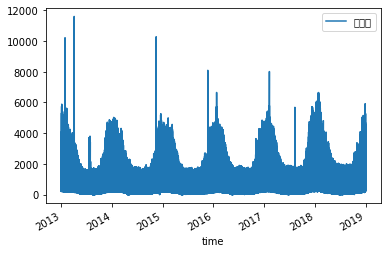

In [22]:
df.plot(x ='time', y='공급량', kind = 'line')

In [25]:
pd.plot(df, values = '공급량', index = 'time')

AttributeError: module 'pandas' has no attribute 'plot'